In [1]:
import numpy as np
import random
import torch
import sklearn
random_seed = 1968
# Set random seed for NumPy
np.random.seed(random_seed)

# Set random seed for Python built-in random module
random.seed(random_seed)

# Set random seed for PyTorch
torch.manual_seed(random_seed)

# Set random seed for Scikit-learn
sklearn.utils.check_random_state(random_seed)


RandomState(MT19937) at 0x1FC6073BE40

# Preping annotations

In [2]:
import pandas as pd

current_annotations_file = "../data/intermediate/annotations/personne_1400annotations_2024-03-27_ActiveTigger.csv"

annotations_file = pd.read_csv(current_annotations_file, dtype = {'sentence_id':'int', 
'Personne':'str','sentence_text':'str'}).set_index('sentence_id')
annotations_file = annotations_file[~annotations_file["Personne"].isna()]

annotations_file.sample(5)

,Personne,sentence_text
sentence_id,,
1240351,Personne à protéger,"52 Lois n° 94548 du 1 er juillet 1994, n°94 -6..."
1430748,Personne relationnelle,"Par ailleurs, pour que cette information puiss..."
1420173,Personne à protéger,Leur inconfort peut relever de la simple gêne ...
590105,Individu ou sujet,Elles sont la majorité. Si dans les années 70 ...
110038,Personne responsable et autonome,"Il s'agit, avant tout, d'une étude à visée méd..."


In [3]:
base_shuffled = pd.read_pickle("../data/intermediate/big/base_shuffled.pkl")
base_shuffled.sentence_id = base_shuffled.sentence_id.apply(int)

base_shuffled.set_index('sentence_id', inplace= True)

base_shuffled.head(5)

,sentence_text,sentence,personne,humain,individu,Titre,Date,president,rapporteurs,membres_gt,theme,saisine,divergence,CNPEN,tableaux et graphiques,nb_mots,number_sentences,nb_pages,sentence_index,num
sentence_id,,,,,,,,,,,,,,,,,,,,
770722,Avec l’accumulation de grandes quantités de do...,Le principe de la noncommercialisation du corp...,False,True,False,Problèmes éthiques posés par les collections d...,2003-03-20,Sicard (00-08),"Hélène Gaumont-Prat,Nicole Questiaux,Gérard Orth","Nicole Baumann,Anne Cambon-Thomsen,Monique Can...",Société,False,0.0,0.0,1,22196,730,51,722,77
930350,Le critère du consentement : le consentement p...,Dans la mesure où le matériel biologique brut ...,True,False,False,Commercialisation des cellules souches humaine...,2006-06-22,Sicard (00-08),Monique Canto-Sperber,"Anne Cambon-Thomsen,Hélène Gaumont-Prat,Chanta...","Don, consentement",False,0.0,0.0,0,22028,703,40,350,93
1070205,"Notons, en outre, que si l’on considérait que ...","Or, le Comité estime pr écisément que la catég...",True,False,False,Avis sur les problèmes éthiques liés aux diagn...,2009-10-15,Grimfeld (09-11),"Pierre Le Coz,Dominique Stoppa-Lyonnet","Annick Alpérovitch,Joëlle Belaisch-Allart,Fréd...",Procréation,False,0.0,0.0,0,14877,520,28,205,107
180058,"Dans cette perspective, on concluera que légit...","De fondation, en vertu même des principes qui ...",True,False,False,Etat des études conduites par le Comité concer...,1989-12-15,Bernard (83-91),NaN,NaN,Génétique et Diagnostic,False,0.0,0.0,0,4177,142,8,58,18
1301177,"Qui fautil informer, quand et com ment ? Comme...",Comment respecter le droit \nde la personne de...,True,False,False,"Données massives et santé : Etat des lieux, pr...",2019-06-29,Delfraissy (16-),"Laure Coulombel,Pierre Delmas-Goyon","Gilles Adda,Thomas Bourgeron,Jean-Marie Delaru...",Société,True,0.0,0.0,0,44296,1373,94,1177,130


In [4]:
annotations_file = annotations_file.join(base_shuffled[['sentence']], how = "left")

annotations_file

,Personne,sentence_text,sentence
sentence_id,,,
1220587,Corps humain,S’il semble dès lors naïf de penser que le sen...,Il importe donc de tenir compte de toutes les ...
1360306,Personne responsable et autonome,"Certains parcours de soins, les limites des po...",Ces personnes donnent un consentement qui relè...
580205,Personne responsable et autonome,"Un rapport\r\neuropéen (Koch et al ., 1996, [5...","Sur le plan éthique, cette évolution peut être..."
700014,Personne responsable et autonome,"Dans de nombreux cas, il n'existe pas de texte...",C'est dans ce cadre que peut se\nposer la ques...
870085,Personne à protéger,Cette situation place parfois la médecine en u...,"Si le sujet est majeur, \nson refus de transfu..."
...,...,...,...
140369,Individu ou sujet,Ces données illustrent les\r\nfaiblesses du dé...,"Un faux positif, par manque de spécificité ou ..."
1280154,Individu ou sujet,Le regard que la société porte sur la personne...,Nous pouvons \net devons penser autrement le v...
1291296,Genre/espèce humaine,"Ces personnes morales, qu’elles soient de \r\...","Certes, \n ..."


In [5]:
import pandas as pd
from transformers import GPT2Tokenizer

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Function to count the number of tokens in a sentence
def count_tokens(sentence):
    tokens = tokenizer.tokenize(sentence)
    return len(tokens)

# Apply the function to the 'sentence' column and create a new column 'num_tokens'
base_shuffled['num_tokens'] = base_shuffled['sentence'].apply(count_tokens)

annotations_file['num_tokens'] = annotations_file['sentence'].apply(count_tokens)

# Display the dataframe with the new column
print("nombre de token. sum(toutes les phrases) :", np.sum(base_shuffled.num_tokens),"sum(annotation)",np.sum(annotations_file.num_tokens))


nombre de token. sum(toutes les phrases) : 773301 sum(annotation) 140168


In [6]:
system_prompt = """Tu es un expert en éthique qui doit classifier des phrases présentes dans les textes d'un comité de bioéthique. Le but est de comprendre le traitement de la personne/de l'individu/de l'humain dans ces questionnements éthiques. 
Tu dois classifier une phrase en français parmi l'une des catégories suivantes : Corps humain, Genre/espèce humaine, Individu ou sujet, Personne à protéger, Personne relationnelle, Personne responsable et autonome, Poubelle, Sentiment humain. 
Ne fais pas une phrase complète, ni ne donne de justification, juste donne l'intitulé de la catégorie.
Voici une courte description de chaque catégorie :
Corps humain = tout ce qui réfère directement au corps humain, comme le matériel biologique, des explications biologiques ou les débats autour du statut de l'embryon.
Genre/espèce humaine = tout ce qui relève de ce que l'humanité partage en commun, le fait d'être un être humain et de ce que l'humanité partage avec le reste du vivant, en particulier mais pas que les questions d'écologie.
Individu ou sujet = tout ce qui relève de la statistique, ou de l'économie, compter les gens ou en parler comme d'une population à gérer.
Personne à protéger = tout ce qui relève de l'idée de protection de la personne, en particulier dans un sens médicale.
Personne relationnelle = quand la personne est définie par son entourage, ou quand son entourage est important. Par exemple, si on parle d'une personne de confiance ou collégialité.
Personne responsable et autonome = tout ce qui relève de conserver l'autonomie de la personne ou de traiter la personne comme un agent responsable de ses actes, en particulier une responsabilité juridique. S'applique aussi quand la personne est capable de se déterminer grâce à l'entourage, grâce à ses relations par exemple avec le personnel médical.
Poubelle = catégorie à utiliser si et seulement si le texte ne réfère pas à la personne (erreur de frappe comme personne l ou personne lle).
Sentiment humain = catégorie plus rare mais importante qui inclut les cas où ce sont les sentiments que nous éprouvons en tant qu'humain qui sont importants comme la dignité, l'empathie.
"""
user_prompt = """
A quelle catégorie appartient la phrase que je te donne parmi les catégories suivantes : Corps humain, Genre/espèce humaine, Individu ou sujet, Personne à protéger, Personne relationnelle, Personne responsable et autonome, Poubelle, Sentiment humain. 
Ne fais pas une phrase complète, ni ne donne de justification, juste donne l'intitulé de la catégorie.
La phrase à classifier est la suivante :

"""
print(system_prompt)
print(user_prompt)

Tu es un expert en éthique qui doit classifier des phrases présentes dans les textes d'un comité de bioéthique. Le but est de comprendre le traitement de la personne/de l'individu/de l'humain dans ces questionnements éthiques. 
Tu dois classifier une phrase en français parmi l'une des catégories suivantes : Corps humain, Genre/espèce humaine, Individu ou sujet, Personne à protéger, Personne relationnelle, Personne responsable et autonome, Poubelle, Sentiment humain. 
Ne fais pas une phrase complète, ni ne donne de justification, juste donne l'intitulé de la catégorie.
Voici une courte description de chaque catégorie :
Corps humain = tout ce qui réfère directement au corps humain, comme le matériel biologique, des explications biologiques ou les débats autour du statut de l'embryon.
Genre/espèce humaine = tout ce qui relève de ce que l'humanité partage en commun, le fait d'être un être humain et de ce que l'humanité partage avec le reste du vivant, en particulier mais pas que les questi

In [7]:
# Step 1: Concatenate user_prompt with sentence
annotations_file['full_question'] = "Pour la phrase d'identifiant id:" + annotations_file.index.astype(str) + ';\n' + user_prompt + '\n' + annotations_file['sentence']

annotations_file.sample(5)


,Personne,sentence_text,sentence,num_tokens,full_question
sentence_id,,,,,
650155,Personne à protéger,"Mais on peut observer que, pour avoir une vale...",Le souhaitable n'est défini qu'en termes de dr...,23,Pour la phrase d'identifiant id:650155;\n\nA q...
1430923,Personne responsable et autonome,"La Cour, qui ne s’est pas interrogée sur la qu...","S’agissant de l’article 702 du FISA, elle jug...",126,Pour la phrase d'identifiant id:1430923;\n\nA ...
1240037,Corps humain,La génomique à l’heure du séqu ençage d’ADN à ...,"D’autre \npart, la connaissance et la compréhe...",151,Pour la phrase d'identifiant id:1240037;\n\nA ...
250123,Personne responsable et autonome,"Le secret médical doit être respecté, non seul...",Toute détermination de caractères de génotype ...,49,Pour la phrase d'identifiant id:250123;\n\nA q...
1240959,Personne relationnelle,Tout d’abord la règle de princi pe du code civ...,"Puis, dans un second temps, elles énoncent des...",154,Pour la phrase d'identifiant id:1240959;\n\nA ...


# Export jsonl

In [9]:
from sklearn.model_selection import train_test_split

# Step 2: Separate train and test split, stratifying by annotation categories
train, test = train_test_split(annotations_file[["full_question","Personne"]], 
                               stratify=annotations_file['Personne'], random_state=random_seed)

def dataframe_to_json(system_prompt, dataframe):
    json_data = []
    for _, row in dataframe.iterrows():
        messages = []
        messages.append({"role": "system", "content": system_prompt})
        messages.append({"role": "user", "content": row['full_question']})
        messages.append({"role": "assistant", "content": row['Personne']})
        json_data.append({"messages": messages})
    return json_data

train_json = dataframe_to_json(system_prompt=system_prompt,dataframe=train)
test_json = dataframe_to_json(system_prompt=system_prompt,dataframe=test)

import json

# Save train_json
with open('../data/intermediate/big/gpt/train.jsonl', 'w') as f:
    for item in train_json:
        json.dump(item, f)
        f.write('\n')

# Save test_json
with open('../data/intermediate/big/gpt/test.jsonl', 'w') as f:
    for item in test_json:
        json.dump(item, f)
        f.write('\n')


# redo test and confusion matrix    

In [10]:
test.sample()

,full_question,Personne
sentence_id,,
1060067,Pour la phrase d'identifiant id:1060067;\n\nA ...,Individu ou sujet


In [11]:
from openai import OpenAI
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rerun = False

# Set up your OpenAI API key
client = OpenAI(
    api_key = ""
)

# Load your test set
texts = test['full_question'].tolist()
true_labels = test['Personne'].tolist()

# Get unique labels from true labels
unique_labels = list(pd.Series(true_labels).unique())
unique_labels.append("Miscellaneous")

# Function to get predictions from the fine-tuned model
def get_predictions(texts):
    predictions = []
    full_responses = []
    for text in texts:
        response =  client.chat.completions.create(
            model="ft:gpt-3.5-turbo-0125:personal:personne-1400-v1:9UY0VQuv",
            messages = [
                {'role': "system", 'content':system_prompt},
                {'role': "user", 'content':text}
            ]
        )
        full_responses.append(response)
        prediction = response.choices[0].message.content
        predictions.append(prediction)
    return predictions

# Get predictions
if rerun:
    predicted_labels, full_responses = get_predictions(texts)
else:
    test = pd.read_pickle('../data/intermediate/big/gpt/gpt_test_with_predictions.pkl')
    predicted_labels = test["Predicted_Label"]
    full_responses = test["Full_response"]

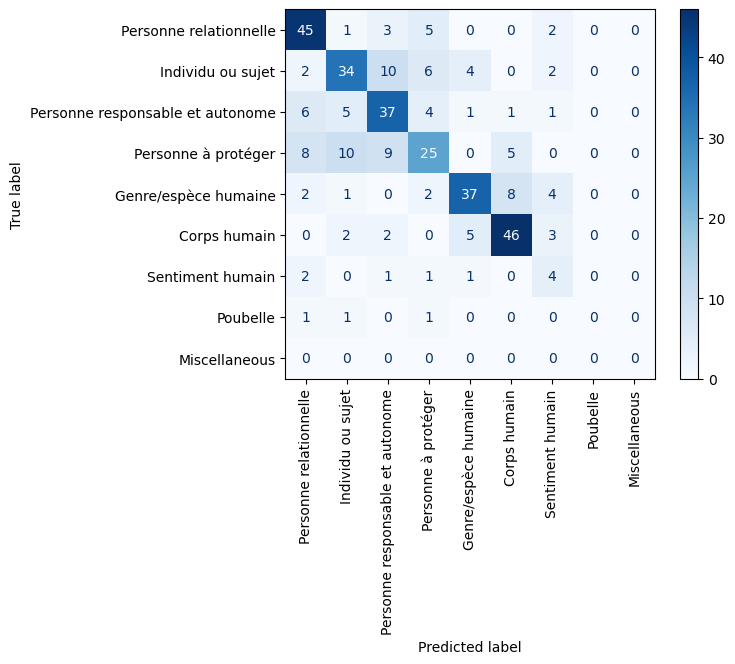

In [12]:
# Handle miscellaneous predictions
corrected_predictions = [
    prediction if prediction in unique_labels else "Miscellaneous"
    for prediction in predicted_labels
]

# Create confusion matrix
cm = confusion_matrix(true_labels, corrected_predictions, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Add predictions to the DataFrame
test['Predicted_Label'] = predicted_labels
test['Corrected_Prediction'] = corrected_predictions
test['Full_response'] = full_responses

# Save the DataFrame as a .pkl file
test.to_pickle('../data/intermediate/big/gpt/gpt_test_with_predictions.pkl')

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming 'test' is your DataFrame containing the true and predicted labels

# Calculate overall metrics
accuracy = accuracy_score(test['Personne'], test['Corrected_Prediction'])
f1 = f1_score(test['Personne'], test['Corrected_Prediction'], average='weighted')
precision = precision_score(test['Personne'], test['Corrected_Prediction'], average='weighted')
recall = recall_score(test['Personne'], test['Corrected_Prediction'], average='weighted')

# Print overall metrics
print("Overall Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}\n")

# Calculate metrics for each category
unique_labels = test['Personne'].unique()
f1_per_category = f1_score(test['Personne'], test['Corrected_Prediction'], average=None, labels=unique_labels)
precision_per_category = precision_score(test['Personne'], test['Corrected_Prediction'], average=None, labels=unique_labels)
recall_per_category = recall_score(test['Personne'], test['Corrected_Prediction'], average=None, labels=unique_labels)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Category': unique_labels,
    'Precision': precision_per_category,
    'Recall': recall_per_category,
    'F1-Score': f1_per_category})

# Display the DataFrame
print(metrics_df)


Overall Metrics:
Accuracy: 0.6514285714285715
F1 Score: 0.6480191921826026
Precision: 0.6521455647100809
Recall: 0.6514285714285715

                           Category  Precision    Recall  F1-Score
0            Personne relationnelle   0.681818  0.803571  0.737705
1                 Individu ou sujet   0.629630  0.586207  0.607143
2  Personne responsable et autonome   0.596774  0.672727  0.632479
3               Personne à protéger   0.568182  0.438596  0.495050
4              Genre/espèce humaine   0.770833  0.685185  0.725490
5                      Corps humain   0.766667  0.793103  0.779661
6                  Sentiment humain   0.250000  0.444444  0.320000
7                          Poubelle   0.000000  0.000000  0.000000


c:\Users\leopo\anaconda3\envs\ccne\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leopo\anaconda3\envs\ccne\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
